Exact value =  0.563436
Monte Carlo estimate: 0.577260 +/- 0.023255
Importance sampling estimate: 0.562655 +/- 0.001166


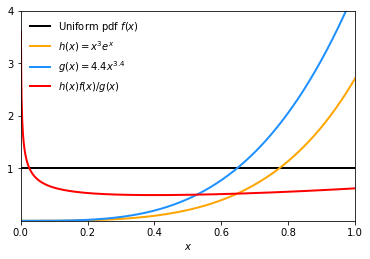

In [1]:
#  importance_sampling.py
#  Simple example to illusrate importance sampling.
#  G. Cowan, RHUL Physics, October 2024

#  x ~ f(x) uniform on [0,1]
#  Goal is to find mean of h(x) 
#  Use g(x) = (theta+1)*x**theta, where theta should be chosen such
#  that g(x) is close to proportional to |h(x)| * f(x).

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


# Define the function h(x)
def h(x):
    return np.exp(x) * x**3

# Define the pdf f(x) (here uniform on [0,1])
def f(x):
    return np.ones_like(x)

# Define the pdf g(x)
def g(x, theta):
    return (theta+1) * pow(x, theta)

# Monte Carlo mean from f
def mean_h_MC (N):
    x_from_f = np.random.uniform(0, 1, N)
    mean_h = np.mean(h(x_from_f))
    mean_h2 = np.mean(h(x_from_f)**2)
    sigma_mean_h = np.sqrt((mean_h2 - mean_h**2)/N)
    return mean_h, sigma_mean_h

# Importance sampling with samples from g(x)
def mean_h_IS(N, theta):
    r = np.random.uniform(0, 1, N)
    x_from_g = pow(r, 1./(theta+1))
    hf_over_g = h(x_from_g) * f(x_from_g) / g(x_from_g, theta)
    mean_hf_over_g = np.mean(hf_over_g)
    mean_hf_over_g2 = np.mean(hf_over_g**2)
    sigma_mean_hf_over_g = np.sqrt((mean_hf_over_g2 - mean_hf_over_g**2)/N)
    return mean_hf_over_g, sigma_mean_hf_over_g

# Parameters
theta = 3.4
N = 1000

# Exact result
mean_h_exact = 6 - 2.*np.exp(1)
print(f"Exact value =  {mean_h_exact:.6f}")

# Direct Monte Carlo result
muHat_MC, sigma_muHat_MC = mean_h_MC(N)
print(f"Monte Carlo estimate: {muHat_MC:.6f} +/- {sigma_muHat_MC:.6f}")

# Importance sampling result
muHat_IS, sigma_muHat_IS = mean_h_IS(N, theta)
print(f"Importance sampling estimate: {muHat_IS:.6f} +/- {sigma_muHat_IS:.6f}")

# Make plot
plt.rcParams.update({'font.size': 14})  
x = np.linspace(0, 1, 1000)
xPlot = x[1:]     # do use x=0
hPlot = h(x)
gPlot = g(x, theta)
theta_plus_1 = theta + 1
glabel = fr'$g(x) = {theta_plus_1} x^{{{theta}}}$'
ratioPlot = h(xPlot) * f(xPlot) / g(xPlot, theta)
plt.xlim(0,1)
plt.ylim(0,4)
plt.xlabel(r'$x$')
plt.plot(x, f(x), label=r'Uniform pdf $f(x)$', color='black', lw=2, ls='-')
plt.plot(x, hPlot, label=r'$h(x) = x^3 e^{x}$', color='orange', lw=2, ls='-')
plt.plot(x, gPlot, label=glabel, color='dodgerblue', lw=2, ls='-')
plt.plot(xPlot, ratioPlot, label=r'$h(x)f(x)/g(x)$', color='red', lw=2, ls='-')
plt.subplots_adjust(bottom=0.15)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))
plt.legend(frameon=False)
plt.show()